# SBA National Loan Analysis

# Modeling - Part 1 - Logistic Regression

## 1. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score, matthews_corrcoef, confusion_matrix

from library.preprocessing import processing_pipeline
from library.modeling import createModel, createClassificationMetrics, runGridSearchAnalysis, createConfusionMatrix

In [2]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

## 2. Previewing Data

In [3]:
sba_loans = pd.read_csv('./../data/processed/sba_national_processed_final.csv')

In [4]:
sba_loans.head()

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,GrAppv,SBA_Appv,NAICS_sectors,unemployment_rate,gdp_growth,gdp_annual_change,inflation_rate,inf_rate_annual_chg,NewExist_existing_business,NewExist_new_business,UrbanRural_rural,UrbanRural_urban,isFranchise_not_franchise,RevLineCr_v2_N,RevLineCr_v2_Y,LowDoc_v2_N,LowDoc_v2_Y,MIS_Status_v2_default,state_top10
0,84,4,0,0,60000.0,60000.0,48000.0,45,3.5,4.4472,0.67,2.3377,-0.59,0,1,0,0,1,1,0,0,1,0,0
1,60,2,0,0,40000.0,40000.0,32000.0,72,3.5,4.4472,0.67,2.3377,-0.59,0,1,0,0,1,1,0,0,1,0,0
2,180,7,0,0,287000.0,287000.0,215250.0,62,3.5,4.4472,0.67,2.3377,-0.59,1,0,0,0,1,1,0,1,0,0,0
3,60,2,0,0,35000.0,35000.0,28000.0,0,4.1,4.4472,0.67,2.3377,-0.59,1,0,0,0,1,1,0,0,1,0,0
4,240,14,7,7,229000.0,229000.0,229000.0,0,4.8,4.4472,0.67,2.3377,-0.59,1,0,0,0,1,1,0,1,0,0,1


## 3. Logistic Regression with Standard Scaler

In [5]:
target = 'MIS_Status_v2_default'
X_train_ss, X_test_ss, y_train_ss, y_test_ss = processing_pipeline(sba_loans, target)

### A. Simple Logistic Regression Model

In [6]:
logreg_mod1 = LogisticRegression(random_state = 42)
y_pred = createModel(logreg_mod1, X_train_ss, y_train_ss, X_test_ss)

### B. Evaluation Metrics

In [7]:
acc_score, cr, f1, mcc = createClassificationMetrics(y_pred, y_test_ss)

**Accuracy Score** 

In [8]:
print(acc_score)

0.8488473297775001


**Classification Report**

In [9]:
print(cr)

              precision    recall  f1-score   support

        paid       0.97      0.86      0.91    251315
     default       0.25      0.68      0.37     17539

    accuracy                           0.85    268854
   macro avg       0.61      0.77      0.64    268854
weighted avg       0.93      0.85      0.88    268854



**F1 Score**

In [10]:
print(f1)

0.3703634842428186


**Matthew's Correlation Coefficient**

In [11]:
print(mcc)

0.3523735486503212


### C. Finding Best Logistic Regression Model with Standard Scaler

In [12]:
param_grid = {
    'C': [0.001, 0.1, 1, 10, 100],
    'penalty': ['none', 'l1', 'l2', 'elasticnet']
}

lgr = LogisticRegression(random_state=42)
lgr_ss_best_params, y_pred = runGridSearchAnalysis(lgr, param_grid, X_train_ss, y_train_ss, X_test_ss)

print(lgr_ss_best_params)

{'C': 0.001, 'penalty': 'none'}


In [13]:
acc_score, cr, f1, mcc = createClassificationMetrics(y_pred, y_test_ss)
print('Accuracy Score: {}'.format(acc_score))
print('Matthew\'s Correlation Coefficient: {}'.format(mcc))
print('F1 Score: {}'.format(f1))
print('Classification Report: \n{}'.format(cr))

Accuracy Score: 0.8488398907957478
Matthew's Correlation Coefficient: 0.3523552057765143
F1 Score: 0.3703910268327446
Classification Report: 
              precision    recall  f1-score   support

        paid       0.97      0.86      0.91    251309
     default       0.25      0.68      0.37     17545

    accuracy                           0.85    268854
   macro avg       0.61      0.77      0.64    268854
weighted avg       0.93      0.85      0.88    268854



### D. Confusion Matrix

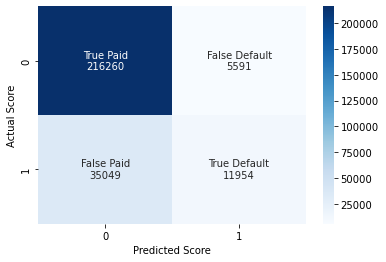

In [14]:
logreg_ss_fp = createConfusionMatrix(y_test_ss, y_pred)

## 4. Logistic Regression with Robust Scaler

In [15]:
target = 'MIS_Status_v2_default'
X_train_rs, X_test_rs, y_train_rs, y_test_rs = processing_pipeline(sba_loans, target, scaler='Robust')

### A. Simple Logistic Regression Model

In [16]:
logreg_rs_mod1 = LogisticRegression(random_state = 42)
y_pred = createModel(logreg_rs_mod1, X_train_rs, y_train_rs, X_test_rs)

### B. Evaluation Metrics

In [17]:
acc_score, cr, f1, mcc = createClassificationMetrics(y_pred, y_test_rs)

**Accuracy Score**

In [18]:
print(acc_score)

0.8457155184598332


**Classification Report**

In [19]:
print(cr)

              precision    recall  f1-score   support

        paid       0.98      0.86      0.91    252905
     default       0.23      0.67      0.34     15949

    accuracy                           0.85    268854
   macro avg       0.60      0.76      0.63    268854
weighted avg       0.93      0.85      0.88    268854



**F1 Score**

In [20]:
print(f1)

0.34108527131782945


**Matthew's Correlation Coefficient**

In [21]:
print(mcc)

0.3294715977010211


### C. Finding Best Logistic Regression Model with Robust Scaler

In [22]:
param_grid = {
    'C': [0.001, 0.1, 1, 10, 100],
    'penalty': ['none', 'l1', 'l2', 'elasticnet']
}

lgr = LogisticRegression(random_state=42)
lgr_rs_best_params, y_pred = runGridSearchAnalysis(lgr, param_grid, X_train_rs, y_train_rs, X_test_rs)

print(lgr_rs_best_params)

{'C': 0.001, 'penalty': 'none'}


In [23]:
acc_score, cr, f1, mcc = createClassificationMetrics(y_pred, y_test_rs)
print('Accuracy Score: {}'.format(acc_score))
print('Matthew\'s Correlation Coefficient: {}'.format(mcc))
print('F1 Score: {}'.format(f1))
print('Classification Report: \n{}'.format(cr))

Accuracy Score: 0.847761238441682
Matthew's Correlation Coefficient: 0.3436053573123628
F1 Score: 0.35771898440197086
Classification Report: 
              precision    recall  f1-score   support

        paid       0.98      0.86      0.91    252131
     default       0.24      0.68      0.36     16723

    accuracy                           0.85    268854
   macro avg       0.61      0.77      0.64    268854
weighted avg       0.93      0.85      0.88    268854



### D. Confusion Matrix

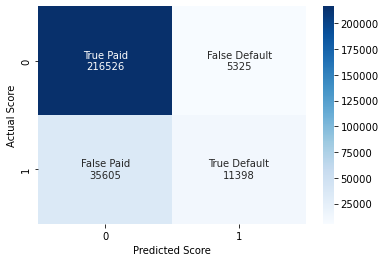

In [24]:
logreg_rs_fp = createConfusionMatrix(y_test_rs, y_pred)

## 5. Best Logistic Regression Model

In [25]:
if logreg_ss_fp > logreg_rs_fp:
    print('Best Logistic Regression Model Params: {}'.format(lgr_rs_best_params))
    print('Best Scaler: Robust Scaler')
else:
    print('Best Logistic Regression Model Params: {}'.format(lgr_ss_best_params))
    print('Best Scaler: Standard Scaler') 

Best Logistic Regression Model Params: {'C': 0.001, 'penalty': 'none'}
Best Scaler: Standard Scaler
